In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
from scipy.special import gamma

#volume of n-dimensional ball
def vol(n,R):
    return np.pi**(n/2.)/gamma(n/2.+1)*R**n


In [171]:
#radius
L=0.5

#number of cells for Riemann sums
N=2**20


#volume estimated with riemann sums
m_riemann=np.zeros(ndim)
#volume estimated by MC sampling
m_sample=np.zeros((ndim,2))

ndim=10

for D in range(1,ndim+1):
    
    #number of cells per dimension
    x=N**(1./D)
    x1=np.ceil(x).astype(int)
    #number of cells
    N1=x1**D

    #cell centers
    cell_centers=-L+np.arange(x1)*2*L/x1+L/x1
    
    m=0 #Riemann sum
    shape=np.repeat(x1,D)

    for n in range(N1):
        
        idx=np.unravel_index(n, shape)
        y=cell_centers[np.asarray(idx)]
                
        #add cell to Riemann sum if |y|**2 < r**2
        m=m+(np.sum(np.square(y))<L**2)

    #multiply by cell volume
    m_riemann[D-1]=m*(2*L/x1)**D

    #sample points uniformly in [0,1]^D
    
    M=10
    s=np.zeros(M)
    
    for k in range(M):
        samples=np.random.random((N,D))-0.5*np.ones((N,D))
        #count samples with |y|**2 < r**2
        s[k]=np.mean(np.sum(np.square(samples),axis=1)<L**2)

    m_sample[D-1,0]=np.mean(s)
    m_sample[D-1,1]=np.std(s)/np.sqrt(M)

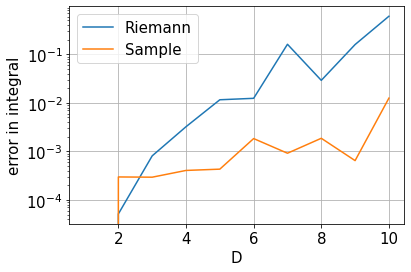

In [175]:
#volume of n-dimensional ball of radius 0.5
x=np.arange(1,ndim+1)
plt.plot(x,np.abs(vol(x,L)-m_riemann)/(vol(x,L)),label='Riemann')
plt.plot(x,np.abs(vol(x,L)-m_sample[:,0])/(vol(x,L)),label='Sample')
plt.yscale('log')
plt.ylabel('error in integral',size=15)
plt.xlabel('D',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize=15)
plt.grid()

In [176]:
#dimension

D=4

N_vec=2**(4*np.arange(2,6))

print(N_vec)

#volume estimated with riemann sums
m_riemann=np.zeros(len(N_vec))
#volume estimated by MC sampling
m_sample=np.zeros((len(N_vec),2))


for i in range(len(N_vec)):
               
    N=N_vec[i]
    
    #number of cells per dimension
    x=N**(1./D)
    x1=np.ceil(x).astype(int)
    #number of cells
    N1=x1**D

    #cell centers
    cell_centers=-L+np.arange(x1)*2*L/x1+L/x1
    
    m=0 #Riemann sum
    shape=np.repeat(x1,D)

    for n in range(N1):
        
        idx=np.unravel_index(n, shape)
        y=cell_centers[np.asarray(idx)]
                
        #add cell to Riemann sum if |y|**2 < r**2
        m=m+(np.sum(np.square(y))<L**2)

    #multiply by cell volume
    m_riemann[i]=m*(2*L/x1)**D

    #sample points uniformly in [0,1]^D
    M=10
    s=np.zeros(M)
    
    for k in range(M):
        samples=np.random.random((N,D))-0.5*np.ones((N,D))
        #count samples with |y|**2 < r**2
        s[k]=np.mean(np.sum(np.square(samples),axis=1)<L**2)

    #count samples with |y|**2 < r**2
    m_sample[i,0]=np.mean(s)
    m_sample[i,1]=np.std(s)/np.sqrt(M) 

[    256    4096   65536 1048576]


[0.3125     0.3203125  0.31054688 0.30941772]
[[3.15234375e-01 8.85694273e-03]
 [3.11669922e-01 2.73572616e-03]
 [3.09359741e-01 9.29844615e-04]
 [3.08137798e-01 1.13137970e-04]]
0.30842513753404244


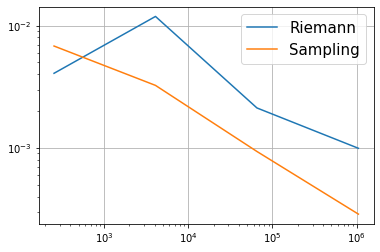

In [179]:
plt.plot(N_vec,np.abs(vol(D,L)-m_riemann),label='Riemann')
plt.plot(N_vec,np.abs(vol(D,L)-m_sample[:,0]),label='Sampling')
plt.xscale('log')
plt.yscale('log')
#plt.plot(N_vec,1./N_vec**(0.5),label)
#plt.plot(N_vec,1./N_vec**(0.25))
#plt.ylabel('error in integral',size=15)
#plt.xlabel('D',size=15)
#plt.xticks(size=15)
#plt.yticks(size=15)
plt.legend(fontsize=15)
plt.grid()

print(m_riemann)
print(m_sample)
print(vol(D,L))

In [156]:
# mean and std of normal
mu=0
sigma=1

# define cells in [-5*sigma,5*sigma]^D
L=5*sigma

N=2**20

#volume estimated with riemann sums
m_riemann=np.zeros(ndim)
#volume estimated by MC sampling
m_sample=np.zeros(ndim)

ndim=15

for D in range(1,ndim+1):

    #number of cells per dimension
    x=N**(1./D)
    x1=np.ceil(x).astype(int)
    #number of cells
    N1=x1**D

    #cell centers
    cell_centers=-L+np.arange(x1)*2*L/x1+L/x1
    
    m=0 #Riemann sum
    
    shape=np.repeat(x1,D)

    for n in range(N1):
        
        idx=np.unravel_index(n, shape)
        y=cell_centers[np.asarray(idx)]
                
        #add  norm(mu,sigma,y)*|y|**2 to Riemann sums
        m=m+np.exp(-0.5*np.sum(np.square(y)))*1./(2*np.pi)**(D/2.)*np.sum(np.square(y))
 
    #multiply by cell volume
    m_riemann[D-1]=m*(2*L/x1)**D
    print(m_riemann[D-1])
    
    samples=np.random.normal(0,1,(N,D))
    
    m_sample[D-1]=np.mean(np.sum(np.square(samples),axis=1))

    print(m_sample[D-1])

    

0.9999845595017082
1.0003537533306635
1.9999679752502466
2.00233385393464
2.9999506830251526
2.9998787967965876
3.9999373318961835
3.999560467228359
4.999935496966371
5.003683958855469
5.99994728737391
5.998498952469344
7.000798791233446
6.997226212216778
8.079964307047268
7.999139901382353
8.802107735641766
9.004354593649584
6.527005160137841
9.999578851362283
6.569491041688399
10.99711667811596
6.557606750716823
12.001457055152214
49.817052701742696
13.00469270878783
71.89463865065876
13.999227549358515
103.22705098116226
14.99954757724035


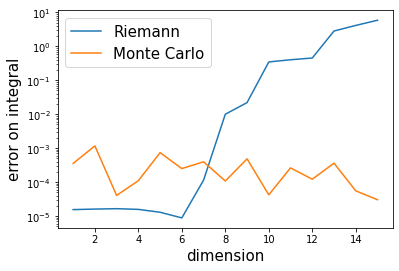

In [157]:
plt.plot(np.arange(1,D+1),np.divide(np.abs(m_riemann-np.arange(1,D+1)),np.arange(1,D+1)),label='Riemann')
plt.plot(np.arange(1,D+1),np.divide(np.abs(m_sample-np.arange(1,D+1)),np.arange(1,D+1)),label='Monte Carlo')
#plt.plot(np.arange(1,D+1),N**(-1./np.arange(1,D+1)))
plt.xlabel('dimension',size=15)
plt.ylabel('error on integral',size=15)
plt.legend(fontsize=15)
plt.yscale('log')
